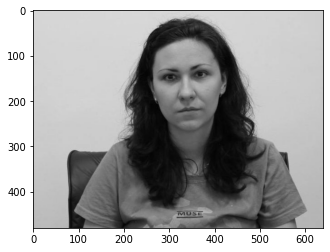

In [1]:
import cv2
import matplotlib.pyplot as plt
img_boy = cv2.imread("eyes004153.jpg",cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(img_boy,cv2.COLOR_GRAY2RGB)
plt.imshow(input_image_backtorgb)
# plt.imshow(cv2.cvtColor( img_boy, cv2.COLOR_BGR2RGB))

In [2]:
input_image_backtorgb.shape

(480, 640, 3)

In [3]:
img_boy.shape

(480, 640)

In [6]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# gray = cv2.cvtColor(img_boy, cv2.COLOR_BGR2RGB)
eyes = eye_cascade.detectMultiScale(input_image_backtorgb,1.1,4)
for (x,y,w,h) in eyes:
    cv2.rectangle(input_image_backtorgb,(x,y),(x+w,y+h),(0,255,0),2)

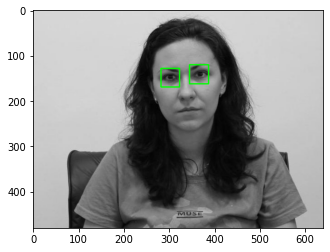

In [7]:
plt.imshow(cv2.cvtColor(input_image_backtorgb, cv2.COLOR_BGR2RGB))

In [8]:
for (x,y,w,h) in eyes:
    roi_gray = input_image_backtorgb[y:y+h, x:x+w]
    roi_color = input_image_backtorgb[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

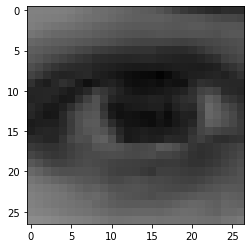

In [9]:
# plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))
plt.imshow(eyes_roi)

In [10]:
eyes_roi.shape

(27, 27, 3)

In [13]:
final_image.shape

(1, 150, 150, 3)

In [12]:
import numpy as np
final_image = cv2.resize(eyes_roi, (150,150))
# new_input_array = np.array(final_image).reshape(-1,150,150,3)
final_image = np.expand_dims(final_image,axis=0)
final_image=  final_image/255.0

In [14]:
from tensorflow.keras.models import load_model
newmodel = load_model('drowsiness_model_vgg_best.h5')

In [15]:
newmodel.predict(final_image)

array([[0.99991643]], dtype=float32)

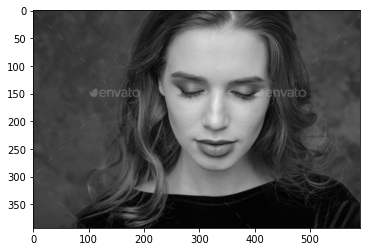

In [17]:
img_girl = cv2.imread("close.jpg",cv2.IMREAD_GRAYSCALE)
# plt.imshow(cv2.cvtColor( img_girl, cv2.COLOR_BGR2RGB))
input_image_backtorgb = cv2.cvtColor(img_girl,cv2.COLOR_GRAY2RGB)
plt.imshow(input_image_backtorgb)

In [18]:
# gray_close = cv2.cvtColor(img_girl, cv2.COLOR_BGR2RGB)
eyes_close = eye_cascade.detectMultiScale(input_image_backtorgb,1.1,4)
for (x,y,w,h) in eyes_close:
    cv2.rectangle(input_image_backtorgb,(x,y),(x+w,y+h),(0,255,0),2)

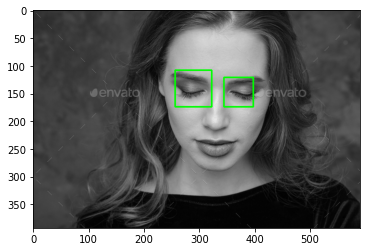

In [19]:
plt.imshow(cv2.cvtColor(input_image_backtorgb, cv2.COLOR_BGR2RGB))

In [22]:
for (x,y,w,h) in eyes_close:
    roi_gray = input_image_backtorgb[y:y+h, x:x+w]
    roi_color = input_image_backtorgb[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

eyes are not detected


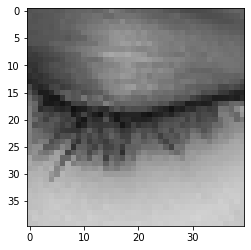

In [23]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [24]:
final_image = cv2.resize(eyes_roi, (150,150))
final_image = np.expand_dims(final_image,axis=0)
final_image=  final_image/255.0

In [25]:
newmodel.predict(final_image)

array([[0.00120908]], dtype=float32)

array([[1.]], dtype=float32)

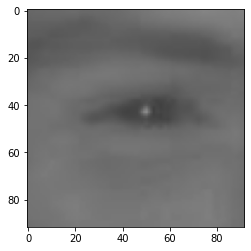

In [37]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00019_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(150,150))
new_input_array = np.array(new_input_array).reshape(-1,150,150,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = newmodel.predict(new_image)
prediction